# K-Means Clustering - Unsupervised Machine Learning

### Unsupervised machine Learning - No Target Feature 
### Cluster - Main goal is to classify similar datapoints togethor

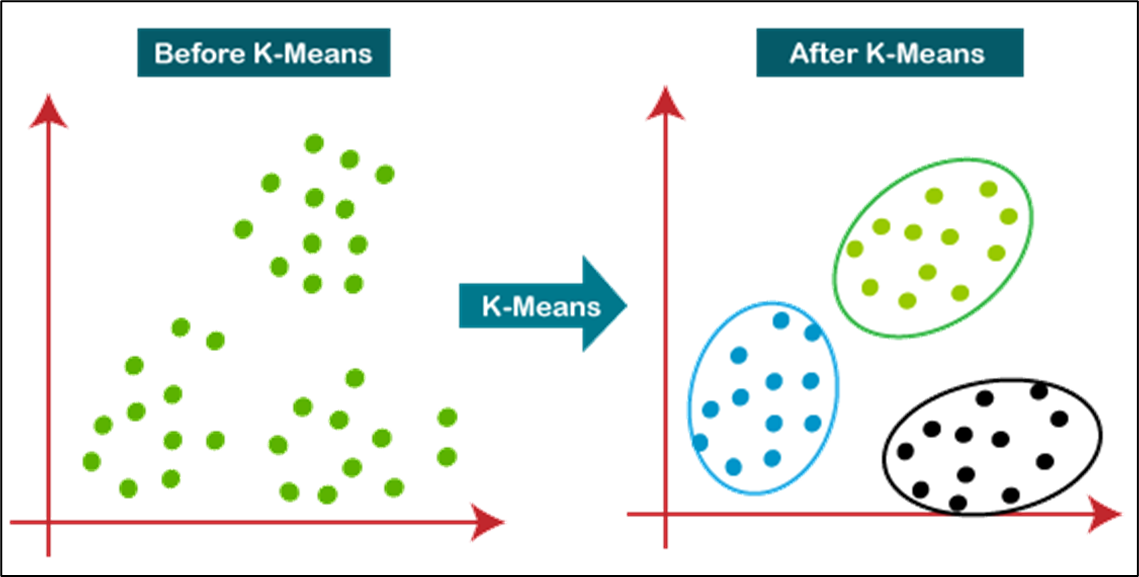

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the mall customers dataset

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Categorize similar customers togethor on basis of Income and Spending

### Get the value of X

In [9]:
X = df[['Income', 'Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Visualize the data with scatterplot

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

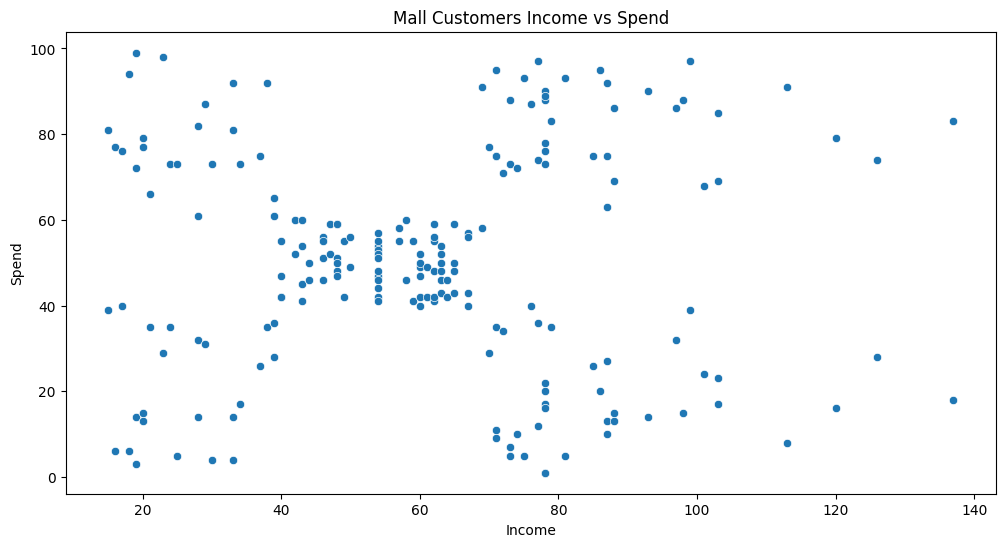

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Mall Customers Income vs Spend')
plt.show()

### Preprocess the X data

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Calculate optimum number of clusters

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

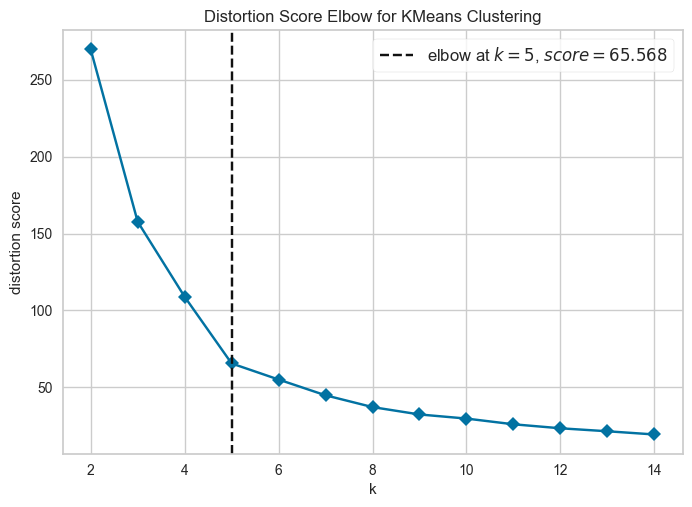

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [21]:
kelbow_visualizer(KMeans(), X_pre, k=(2,15), timings=False)

### From elbow method select optimal clusters as 5

In [22]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [23]:
model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

### Save the labels in X dataframe

In [24]:
X['Label']=model.labels_
X.head()

,Income,Spend,Label
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [25]:
X['Label'].unique()

array([2, 3, 1, 4, 0])

### Check each cluster

In [26]:
X[X['Label']==0]

,Income,Spend,Label
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [27]:
X[X['Label']==1]

,Income,Spend,Label
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [28]:
X[X['Label']==2]

,Income,Spend,Label
0,15,39,2
2,16,6,2
4,17,40,2
6,18,6,2
8,19,3,2
10,19,14,2
12,20,15,2
14,20,13,2
16,21,35,2
18,23,29,2


In [29]:
X[X['Label']==3]

,Income,Spend,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [30]:
X[X['Label']==4]

,Income,Spend,Label
123,69,91,4
125,70,77,4
127,71,95,4
129,71,75,4
131,71,75,4
133,72,71,4
135,73,88,4
137,73,73,4
139,74,72,4
141,75,93,4


### Calculate centroid for each cluster

In [31]:
centroid = X.groupby(by='Label').mean()
centroid

,Income,Spend
Label,,
0,88.200000,17.114286
1,55.296296,49.518519
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


### Visualizing customers with centroids

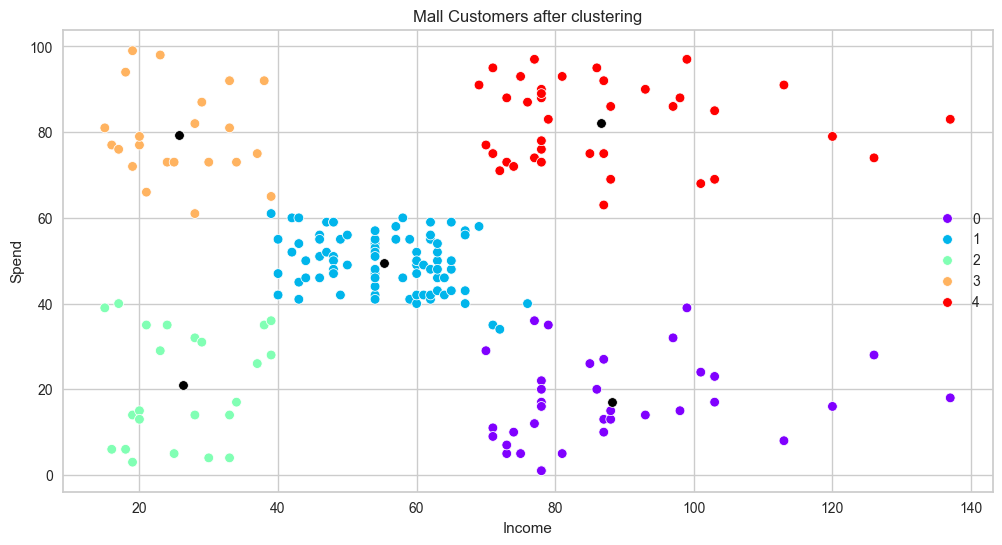

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=X, x='Income', y='Spend', hue='Label', palette='rainbow')
sns.scatterplot(data=centroid, x='Income', y='Spend', color='black')
plt.title('Mall Customers after clustering')
plt.show()